In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import warnings
import os
warnings.filterwarnings("ignore")

In [2]:
data_path = os.path.join('..','..','1_Data','Raw Data','train_V2.csv')
output_path = 'data'
df = pd.read_csv(data_path)


In [5]:
df = df.sample(1000000)

In [6]:
in_match_player_features = ['assists','boosts','damageDealt','DBNOs','headshotKills',
                           'killPlace','killPoints','kills','killStreaks','longestKill',
                           'revives','rideDistance','roadKills','swimDistance','roadKills',
                            'swimDistance','teamKills','vehicleDestroys','walkDistance',
                            'weaponsAcquired']

prediction_feature = ['winPlacePerc']

global_player_features = ['killPoints','winPoints','rankPoints']

match_features = ['groupId','matchId','matchDuration']

### Data Correlation

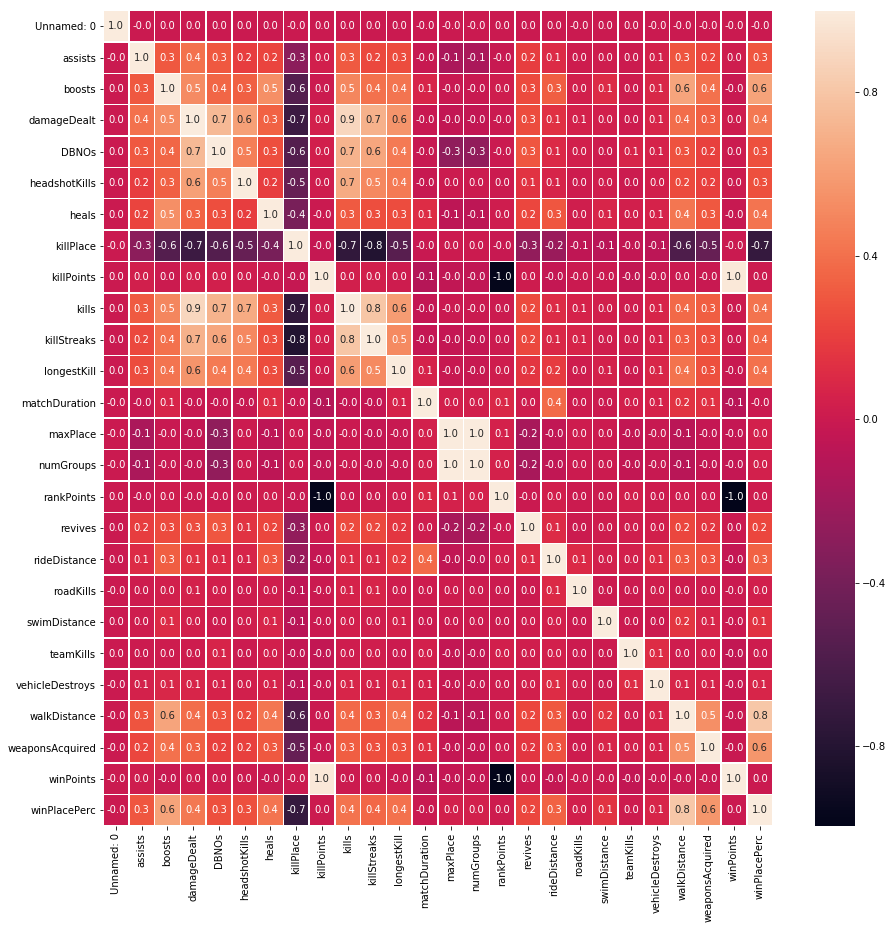

In [6]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

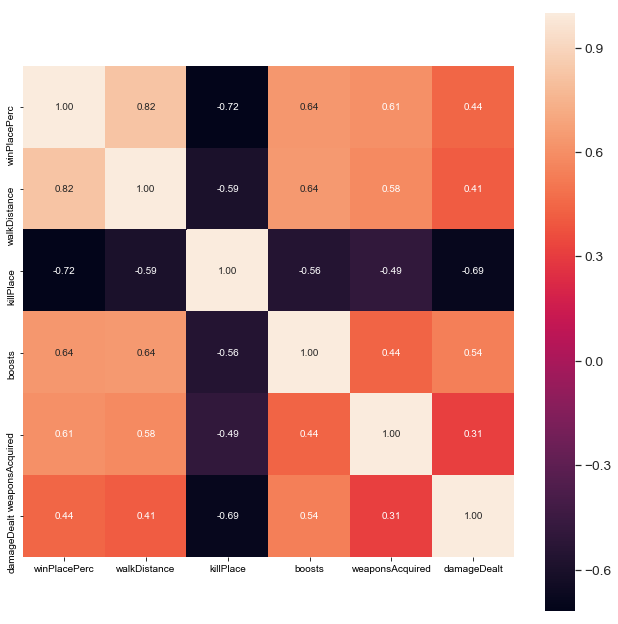

In [7]:
k = 6 #number of variables for heatmap
f,ax = plt.subplots(figsize=(11, 11))
most_cor_cols = df.corr().abs().nlargest(k, 'winPlacePerc')['winPlacePerc'].index
cm = np.corrcoef(df[most_cor_cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=most_cor_cols.values, xticklabels=most_cor_cols.values)
plt.show()

### Creating the models

In [8]:
most_cor_cols = most_cor_cols.drop(prediction_feature)

#### Linear Regression - no polynomial

In [9]:
kf = KFold(n_splits=10,shuffle=True)

X = df[most_cor_cols] 
y = df[prediction_feature]

results_linear = {}

for k, (train, test) in enumerate(kf.split(X, y)):
    reg = LinearRegression(n_jobs=6)
#     print(X.iloc[train].head(2))
    reg.fit(X.iloc[train], y.iloc[train])
    
    y_pred = reg.predict(X.iloc[test])
    y_true =  y.iloc[test]
    rmse = mean_squared_error(y_true, y_pred)
    r2 = reg.score(X.iloc[test], y.iloc[test])
    
    results_linear['fold '+str(k)] = {'coef':reg.coef_,'rmse':rmse,'r2':r2}
    
    print("[fold {0}] coef {1} RMSE {2:.5f} R2: {3:.5f}".
          format(k,reg.coef_,rmse,r2))

[fold 0] coef [[ 0.00012837 -0.00427064  0.02147465  0.01579761 -0.00022705]] RMSE 0.02153 R2: 0.77165
[fold 1] coef [[ 0.00012841 -0.00426809  0.02143922  0.01575234 -0.00022674]] RMSE 0.02126 R2: 0.77543
[fold 2] coef [[ 0.0001285  -0.0042703   0.02136751  0.01568497 -0.00022658]] RMSE 0.02132 R2: 0.77436
[fold 3] coef [[ 0.00012826 -0.00427626  0.02147216  0.0156705  -0.00022733]] RMSE 0.02093 R2: 0.77811
[fold 4] coef [[ 0.00012814 -0.00427658  0.02145222  0.01574298 -0.00022657]] RMSE 0.02113 R2: 0.77650
[fold 5] coef [[ 0.00012834 -0.00427348  0.02143732  0.01573666 -0.00022733]] RMSE 0.02110 R2: 0.77661
[fold 6] coef [[ 0.00012817 -0.00427489  0.02142008  0.01583983 -0.00022745]] RMSE 0.02132 R2: 0.77520
[fold 7] coef [[ 0.00012808 -0.00427682  0.02156399  0.01576764 -0.00022717]] RMSE 0.02109 R2: 0.77690
[fold 8] coef [[ 0.00012824 -0.00426943  0.02149639  0.01577779 -0.00022724]] RMSE 0.02116 R2: 0.77628
[fold 9] coef [[ 0.00012827 -0.00426499  0.02151368  0.01582734 -0.000226

#### Linear Regression - polynomial 2

In [10]:
kf = KFold(n_splits=10,shuffle=True)

X = df[most_cor_cols] 
y = df[prediction_feature]

results_pol2 = {}

for k, (train, test) in enumerate(kf.split(X, y)):
    reg = make_pipeline(PolynomialFeatures(2), LinearRegression())
#     print(X.iloc[train].head(2))
    reg.fit(X.iloc[train], y.iloc[train])
    
    y_pred = reg.predict(X.iloc[test])
    y_true =  y.iloc[test]
    rmse = mean_squared_error(y_true, y_pred)
    r2 = reg.score(X.iloc[test], y.iloc[test])
    
    results_pol2['fold '+str(k)] = {'coef':reg.steps[1][1].coef_,'rmse':rmse,'r2':r2}
    
    print("[fold {0}] coef {1} RMSE {2:.5f} R2: {3:.5f}".
          format(k,reg.steps[1][1].coef_,rmse,r2))

[fold 0] coef [[ 0.00000000e+00  3.20419545e-04  1.09729270e-02  5.53058678e-02
   2.72289383e-02  6.24059517e-05 -2.41257377e-08 -1.59174961e-06
  -9.77838142e-06 -5.70620514e-06 -1.75072371e-08 -1.18302559e-04
  -2.60220250e-04 -2.61142458e-04 -5.16702731e-06 -6.66506489e-04
  -4.44057763e-04 -5.33734649e-06 -6.39299527e-05 -6.92382584e-06
   9.70002643e-08]] RMSE 0.01657 R2: 0.82416
[fold 1] coef [[ 0.00000000e+00  3.19864107e-04  1.09689162e-02  5.53753886e-02
   2.71735307e-02  6.48562387e-05 -2.40673142e-08 -1.58783986e-06
  -9.85032668e-06 -5.65051337e-06 -1.74595608e-08 -1.18280381e-04
  -2.56809071e-04 -2.61673846e-04 -5.20382030e-06 -6.29956031e-04
  -4.54785355e-04 -5.85214227e-06 -6.41155076e-05 -7.17469542e-06
   9.94136568e-08]] RMSE 0.01633 R2: 0.82784
[fold 2] coef [[ 0.00000000e+00  3.19449517e-04  1.09979580e-02  5.58293538e-02
   2.72899863e-02  6.34988811e-05 -2.40618566e-08 -1.58370649e-06
  -9.83701993e-06 -5.69519400e-06 -1.66125353e-08 -1.18555223e-04
  -2.66423

#### Linear Regression - polynomial 5

In [11]:
kf = KFold(n_splits=10,shuffle=True)

X = df[most_cor_cols] 
y = df[prediction_feature]

results_pol5 = {}

for k, (train, test) in enumerate(kf.split(X, y)):
    reg = make_pipeline(PolynomialFeatures(5), LinearRegression())
#     print(X.iloc[train].head(2))
    reg.fit(X.iloc[train], y.iloc[train])
    
    y_pred = reg.predict(X.iloc[test])
    y_true =  y.iloc[test]
    rmse = mean_squared_error(y_true, y_pred)
    r2 = reg.score(X.iloc[test], y.iloc[test])
    
    results_pol5['fold '+str(k)] = {'coef':reg.steps[1][1].coef_,'rmse':rmse,'r2':r2}
    
    print("[fold {0}] coef {1} RMSE {2:.5f} R2: {3:.5f}".
          format(k,reg.steps[1][1].coef_,rmse,r2))

[fold 0] coef [[ 1.18064298e-07  5.02180566e-07 -5.41703032e-08  6.40643761e-09
   1.05670606e-08 -5.50379769e-08  2.93441869e-07 -3.29442915e-07
   2.89494636e-07  8.52831049e-07  1.10567205e-06  7.58321855e-07
   3.37961693e-09  2.27742744e-08 -8.54169519e-07  1.12865527e-09
   1.41189813e-09  1.80659862e-08  9.33155365e-09  7.64291453e-08
  -4.55549940e-06  1.00270311e-11 -1.60067710e-08 -3.34973967e-08
  -8.25207307e-08 -1.18520089e-09 -1.72367574e-07  4.66225502e-06
   1.11641481e-05 -5.12271326e-08  7.06805840e-07  5.64279260e-07
   2.73239389e-07  5.25069751e-06  3.13736775e-07  1.08009286e-10
   2.29243209e-05  1.58351161e-08  4.42079490e-07 -1.31344177e-05
   6.59330287e-09  7.87239240e-09  4.36395045e-07  6.04618066e-08
   8.57639800e-07  1.20418515e-06  1.98127739e-09  4.77854943e-09
   8.32438361e-08  7.63918051e-09  3.47967071e-08  6.82922991e-09
   2.93435982e-08  6.03026648e-07 -4.53060379e-07  9.08857291e-09
  -3.24790956e-15  1.80087512e-13 -7.31735972e-13  6.99079426e

#### Ridge Regression - polynomial 5

In [ ]:
kf = KFold(n_splits=10,shuffle=True)

X = df[most_cor_cols] 
y = df[prediction_feature]

results_pol5_reg = {}

for k, (train, test) in enumerate(kf.split(X, y)):
    reg = make_pipeline(PolynomialFeatures(5), Ridge(alpha=0.01))
#     print(X.iloc[train].head(2))
    reg.fit(X.iloc[train], y.iloc[train])
    
    y_pred = reg.predict(X.iloc[test])
    y_true =  y.iloc[test]
    rmse = mean_squared_error(y_true, y_pred)
    r2 = reg.score(X.iloc[test], y.iloc[test])
    
    results_pol5_reg['fold '+str(k)] = {'coef':reg.steps[1][1].coef_,'rmse':rmse,'r2':r2}
    
    print("[fold {0}] coef {1} RMSE {2:.5f} R2: {3:.5f}".
          format(k,reg.steps[1][1].coef_,rmse,r2))

[fold 0] coef [[ 0.00000000e+00  3.13973957e-04  2.13990012e-02  5.86299266e-02
   4.34849977e-02 -1.66832231e-03 -1.26332563e-08 -1.63726097e-05
  -3.49615306e-05  1.65614604e-05  3.88595303e-07 -1.61735705e-03
  -1.22364690e-03 -7.40173447e-03  5.97465867e-06  4.77954824e-03
  -1.99476804e-02  1.35000546e-04  9.27167257e-04 -1.14498213e-04
   1.95398947e-06  8.87056481e-13 -1.96490524e-09  2.21625339e-09
  -9.51538144e-09 -1.44920596e-10  9.83420249e-07  1.71715064e-06
   1.00391296e-06  1.86741252e-08 -2.73657212e-06  6.49716599e-06
   1.48544480e-08 -2.27114873e-06  1.27856823e-08 -2.61461218e-10
   4.76233658e-05  3.77865922e-05  2.33618470e-04 -4.74537847e-06
  -4.24267216e-05  5.11655825e-04 -8.43609539e-06  3.12786880e-04
   1.89138334e-05  3.37535825e-07  1.06150183e-04  3.22873888e-04
  -5.73462578e-06  1.70762990e-03  2.03027110e-05 -2.49710609e-07
  -2.08678691e-04 -3.81854038e-06  1.08552627e-07 -2.76770892e-10
  -3.25318559e-16  2.80386393e-13  1.30184020e-13  6.83999749e